In [59]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# simple linear regression

# Is a method to help us understand the relationship between two variables:
# . the predictor/independent variable (X)
# . the response/dependent variable (that we want to predict) (Y)

# the result of linear regression is a linear function that predict the response (dependent)
# variable as a function of the predictor (independent variable)

# Y: Response variable
# X: Predictor variables

In [61]:
# load de dataframe
raw_dataset = pd.read_csv("../data/clean_df.csv")
# select objetives columns
raw_dataset = raw_dataset.loc[:, ['city-mpg', 'price']]
# copy dataset
dataset = raw_dataset.copy()
# clean nan values
dataset = dataset.dropna()
# sample train dataset
train_dataset = dataset.sample(frac=0.8, random_state=1)
# sample test dataset
test_dataset = dataset.drop(train_dataset.index)

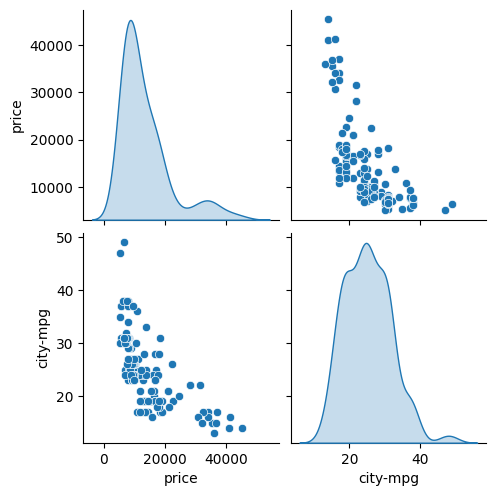

In [62]:
# 1. train a model using city-mpg as the independent variable and price as the dependent variable

# features (independent variables)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
# labels (dependet variable)
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

sns.pairplot(train_dataset[['price', 'city-mpg']], diag_kind='kde')

Coefficients Yhat = a + bX:
intercept (a): 35119.71
slope (b): -861.86
Mean squared error: 18989002.00
Coefficient of determination: 0.54


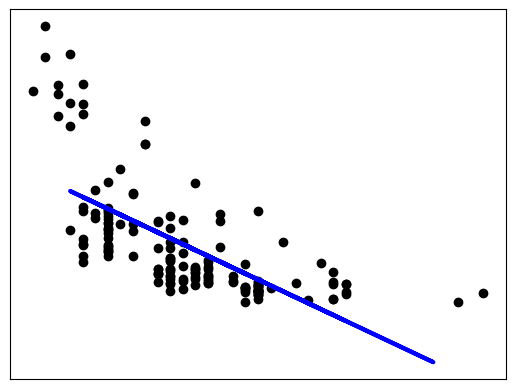

In [63]:
regr = linear_model.LinearRegression()

regr.fit(train_features, train_labels)

price_pred = regr.predict(test_features)

print("Coefficients Yhat = a + bX:")
print(f"intercept (a): {round(regr.intercept_, 2)}")
print(f"slope (b): {round(regr.coef_[0], 2)}")

print("Mean squared error: %.2f" % mean_squared_error(test_labels, price_pred))
print("Coefficient of determination: %.2f" % r2_score(test_labels, price_pred))

plt.scatter(train_features, train_labels, color="black")
plt.plot(test_features, price_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Count')

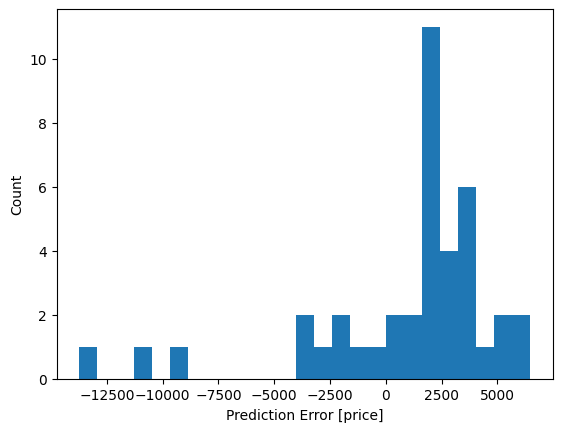

In [64]:
error = price_pred - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [price]")
plt.ylabel("Count")

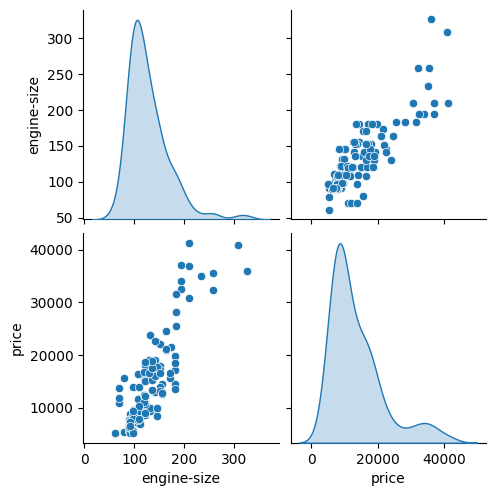

In [65]:
# 2. train a model using engine-size as the independent variable and price as the dependent variable

# load de dataframe
raw_dataset = pd.read_csv("../data/clean_df.csv")
# select objetives columns
raw_dataset = raw_dataset.loc[:, ['engine-size', 'price']]
# copy dataset
dataset = raw_dataset.copy()
# clean nan values
dataset = dataset.dropna()
# sample train dataset
train_dataset = dataset.sample(frac=0.8, random_state=0)
# sample test dataset
test_dataset = dataset.drop(train_dataset.index)

# features (independent variables)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
# labels (dependet variable)
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

sns.pairplot(train_dataset[['engine-size', 'price']], diag_kind='kde')

Coefficients Yhat = a + bX:
intercept (a): -7688.5
slope (b): 166.63
Mean squared error: 9491232.58
Coefficient of determination: 0.83


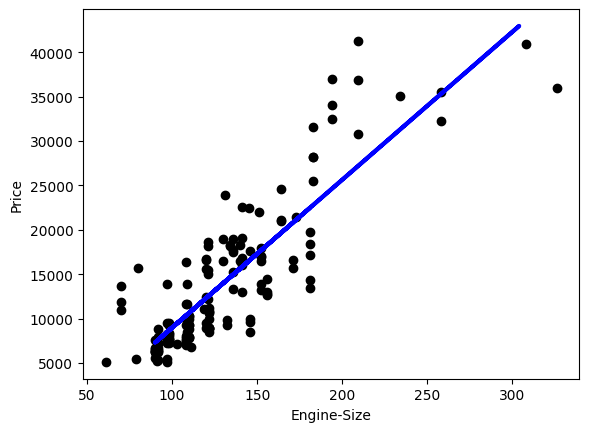

In [78]:
regr = linear_model.LinearRegression()
regr.fit(train_features, train_labels)
price_pred = regr.predict(test_features)

print("Coefficients Yhat = a + bX:")
print(f"intercept (a): {round(regr.intercept_, 2)}")
print(f"slope (b): {round(regr.coef_[0], 2)}")

print("Mean squared error: %.2f" % mean_squared_error(test_labels, price_pred))
print("Coefficient of determination: %.2f" % r2_score(test_labels, price_pred))

plt.scatter(train_features, train_labels, color="black")
# plt.scatter(raw_dataset[["engine-size"]], raw_dataset[["price"]], color="black")
plt.xlabel("Engine-Size")
plt.ylabel("Price")
plt.plot(test_features, price_pred, color="blue", linewidth=3)
plt.show()

Text(0, 0.5, 'Count')

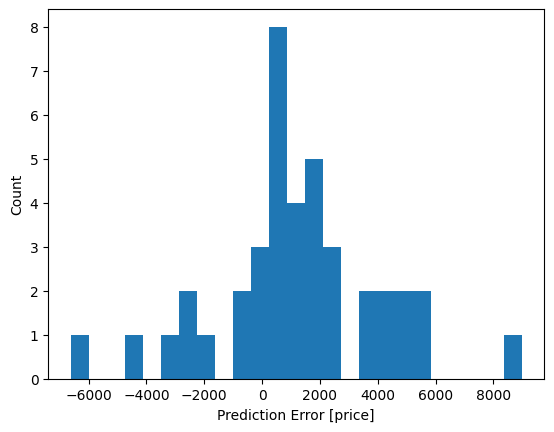

In [67]:
error = price_pred - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [price]")
plt.ylabel("Count")

<Axes: ylabel='Density'>

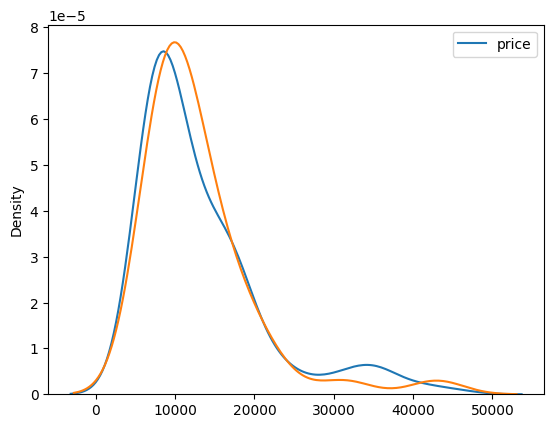

In [123]:
ax1 = sns.kdeplot(raw_dataset[["price"]], label="Actual Value") # yellow
sns.kdeplot(price_pred, label="Fitted Values", ax=ax1)